# Using the GPT API

When using the GPT API, you should use the following message template:

In [ ]:
# "messages": [{"role": "system", "content": "You are a polite and helpful chatbot robot. Provide accurate answers to the questions asked to you."},
#              {"role": "user", "content": "What's the capital of France?"},
#              {"role": "assistant", "content": "Paris"}]

# System: the instructions you give to the model.
# User: the question asked by the user or the text provided to the model.
# Assistant: the response generated by the model to the text provided by the user.

In [ ]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


# SQL Translate

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('openai_key')

In [ ]:
from openai import OpenAI

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY']
)

In [ ]:
system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user="write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."

In [ ]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo", # GPT-3.5-turbo modelinin başa çıkamadığı görevler için GPT-4 modelini kullanabilirsiniz.
  messages=[
      {"role": "system", "content": f"{system}"},
      {"role": "user", "content": f"{user}"}],
  temperature=0,
  top_p=1,
  max_tokens=500,
  presence_penalty=0,
  frequency_penalty=0,
)

# The max_tokens parameter indicates the maximum number of tokens the model can generate in its response.
# If the number of tokens is insufficient, you can increase it.

# TEMPERATURE:
# In GPT models, the temperature parameter controls the randomness/quality of the output. This value can be set between 0 and 2;
# 0 produces the most predictable/high quality output, while 2 produces the most random/low quality output. When the temperature is set to 0,
# The GPT always chooses the answer with the highest probability. When the temperature is set to 2, the randomness of the output increases and the quality of the output drops significantly. 
# However, the recommended temperature value MAX is around 0.8.
# “Our hero ...... the dragon with his sword.“, the probabilities of words that can fill the blank in the sentence are as follows: 
# 40% killed, 30% defeated, wounded 20%, scared 7% and kissed 3%. 
# If the temperature is set to very low values, e.g. 0 or 0.1, the model selects the most likely word “killed”. 
# If the temperature is set to low values, e.g. 0.2 or 0.3, the model selects the most likely words “killed” or “beaten”. 
# If values around 2 are selected, the model randomly selects one of all possible words, including the least likely.

# TOP_P:
# In GPT models, the top_p parameter determines how diverse the tokens/words used for the output produced by the model will be. It takes values between 0 and 1.
# When it is 1, all possible tokens can be used for the output, while the smaller the value, the smaller the variety of tokens that can be used.
# For the example sentence above, if top_p is set to 0.7, it will select the next word from words whose cumulative probability sums do not exceed 0.7.
# (0.4 killed, 0.3 beaten) or (0.4 killed, 0.2 injured, 0.07 frightened, 0.03 kissed).
# If top_p is set to 0.65 for the example sentence above, it will select the next word from words whose cumulative probability sums do not exceed 0.65. 
# (0.4 killed, 0.2 injured, 0.03 kissed) or (0.3 beaten, 0.2 injured, 0.07 frightened, 0.03 kissed).
# If top_p is set to 0.26 for the example sentence above, it will select the next word from words whose cumulative probability sums do not exceed 0.26. 
# (0.2 wounded, 0.03 kissed).
# if top_p is set to zero, the model will only select the token with the highest probability because the cumulative probability sums of tokens will never be zero

# IMPORTANT NOTE:
# OpenAI always recommends setting top_p to 1 and temperature to 0. 
# If the randomness of the output is to be increased, it is recommended to leave top_p fixed at 1 and only play with the temperature hyperparameter.
# Setting both top_p to 1 (maximum) and temperature to 2 (maximum) can greatly increase the randomness of the output, so the quality of the output may be very low.

# FREQUENCY PENALTY AND PRESENCE PENALTY
# Frequency penalty and presence penalty can take values between -2 and +2, values between 0.1 and 1 are recommended.
# Positive values: The “frequency penalty” reduces the probability of a word being selected again as the number of times it is used in the text increases,
# The “presence penalty” reduces the probability of a word being selected again if it has been used in the text. 
# So, the “presence penalty” does not take into account how often a word is used, only whether it is present in the text. If it is present in the text, it is very unlikely to be selected again.
# Negative values: “frequency penalty” increases the probability of a word being selected again as the number of times it is used increases, 
# while “presence penalty” increases the probability of a word being selected again even if it has been used before.


In [ ]:
response

# The model completed the response process smoothly, and finish_reason was returned as 'stop'

ChatCompletion(id='chatcmpl-9G0s1eK4FZL3mBdwciiCcQxltiF23', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='To achieve this, you can use the following SQL query:\n\n```sql\nSELECT e.name\nFROM Employee e\nJOIN Sales_amount sa ON e.id = sa.employee_id\nWHERE sa.date >= DATEADD(month, -3, GETDATE())\nGROUP BY e.id, e.name\nHAVING SUM(sa.amount) > 10000\n```\n\nThis query joins the Employee and Sales_amount tables on the employee_id, filters the sales data for the last 3 months using the DATEADD function, groups the results by employee id and name, and then calculates the total sales amount for each employee. Finally, it filters out the employees whose total sales amount is more than 10,000 EURO.', role='assistant', function_call=None, tool_calls=None))], created=1713603621, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint='fp_c2295e73ad', usage=CompletionUsage(completion_tokens=140, prompt_tokens=91, total_token

In [ ]:
print(response.choices[0].message.content)

Certainly! You can use the following query to achieve this:

```sql
SELECT e.name
FROM Employee e
JOIN Sales_amount sa ON e.id = sa.employee_id
WHERE sa.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY e.id, e.name
HAVING SUM(sa.amount) > 10000
``` 

This query joins the Employee and Sales_amount tables on the employee_id, filters the sales data for the last 3 months, groups the results by employee id and name, and then calculates the total sales amount for each employee. Finally, it selects the names of employees whose total sales in the last 3 months have been more than 10,000 EURO.


## Methods of Obtaining The Desired Response From The GPT API:

### 1.You should clearly and simply specify our instructions to the system.

Zero-Shot Training

In [ ]:
# As you can see, the model has added annotations for the SQL query. If we don't want to see these annotations, we have to specify our instructions to the system in a clear and simple way.

system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way and only return SQL query, don't explain query.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user="write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."


response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
      {"role": "system", "content": f"{system}"},
      {"role": "user", "content": f"{user}"}],
  temperature=0,
  top_p=1,
  max_tokens=500,
  presence_penalty=0,
  frequency_penalty=0,
)

print(response.choices[0].message.content)

```sql
SELECT e.name
FROM Employee e
JOIN Sales_amount sa ON e.id = sa.employee_id
WHERE sa.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY e.id, e.name
HAVING SUM(sa.amount) > 10000
```


### 2.You should show examples to the model.

One-Shot Training

In [ ]:
system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user1 = "write a query to list the names of the employees who live in Ankara"

assistant = """SELECT Employee.name
FROM Employee
JOIN Department
ON Employee.department_id = Department.id
WHERE Department.address = 'Ankara';"""

user2 = "write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."

In [ ]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
          {"role": "system", "content": f"{system}"},
          {"role": "user", "content": f"{user1}"},
          {"role": "assistant", "content": f"{assistant}"},
          {"role": "user", "content": f"{user2}"}],
  temperature=0,
  top_p=1,
  max_tokens=500,
  presence_penalty=0,
  frequency_penalty=0,
)

print(response.choices[0].message.content)

# To ensure that the model output is what we want, we can give the model 1 or more examples of how we want the output to be.

SELECT Employee.name
FROM Employee
JOIN Sales_amount
ON Employee.id = Sales_amount.employee_id
WHERE Sales_amount.date >= DATEADD(month, -3, GETDATE())
GROUP BY Employee.id, Employee.name
HAVING SUM(Sales_amount.amount) > 10000;


## Automate With a Function

In [ ]:
system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way and just return SQL query, don't explain query.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user="write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."

In [ ]:
def chat_model(system, user, model="gpt-3.5-turbo", temperature=0, top_p=1, max_tokens=500, presence_penalty=0, frequency_penalty=0):

  import openai

  response = client.chat.completions.create(
  model=model,
  messages=[
      {"role": "system", "content": f"{system}"},
      {"role": "user", "content": f"{user}"}],
  temperature=temperature,
  top_p=top_p,
  max_tokens=max_tokens,
  presence_penalty=presence_penalty,
  frequency_penalty=frequency_penalty)

  return print(response.choices[0].message.content)

# We will use the chat_model() function for the following examples because it is more practical and understandable.

In [ ]:
chat_model(system, user)

```sql
SELECT e.name
FROM Employee e
JOIN Sales_amount sa ON e.id = sa.employee_id
WHERE sa.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY e.id, e.name
HAVING SUM(sa.amount) > 10000
```


## Explain Code

In [ ]:
system = "You are a python 3 expert. Explain the codes asked to you in the most accurate way."

user = """Explain of what the fallowing code does

def remove_common_prefix(x, prefix, ws_prefix):
    x["completion"] = x["completion"].str[len(prefix) :]
    if ws_prefix:
        # keep the single whitespace as prefix
        x["completion"] = " " + x["completion"]
return x
"""

In [ ]:
user

# Spaces and lines in the code are very important for the model to understand a script. For this reason we will use triple quotes to identify the code blocks we feed to the model. 
# So the model can understand where spaces and new lines are used. 
# You can also do this with single or double quotes # but you will have to define all the spaces and newlines yourself. 
# This is, as you can imagine, a very tedious and time-consuming task.

'Explain of what the fallowing code does\n\ndef remove_common_prefix(x, prefix, ws_prefix):\n    x["completion"] = x["completion"].str[len(prefix) :]\n    if ws_prefix:\n        # keep the single whitespace as prefix\n        x["completion"] = " " + x["completion"]\nreturn x\n'

In [ ]:
chat_model(system, user, model="gpt-4-turbo", max_tokens=1024)

# We increase the maximum number of tokens because the code description can be long.
# We use the gpt-4-turbo model

The provided code snippet defines a Python function named `remove_common_prefix` that is intended to manipulate a dictionary `x` containing a key `"completion"`. The function takes three parameters: `x`, `prefix`, and `ws_prefix`. Here's a breakdown of what each part of the function does:

1. **Function Definition**:
   ```python
   def remove_common_prefix(x, prefix, ws_prefix):
   ```
   This line defines the function `remove_common_prefix` with three parameters:
   - `x`: Expected to be a dictionary with at least one key `"completion"`, which should have a string value.
   - `prefix`: A string that represents a prefix which might be present at the start of `x["completion"]`.
   - `ws_prefix`: A boolean value that determines whether a whitespace should be added to the beginning of the modified string.

2. **Removing the Prefix**:
   ```python
   x["completion"] = x["completion"][len(prefix):]
   ```
   This line modifies the value associated with the key `"completion"` in the diction

## Python bug fixer

In [ ]:
system="You will be provided with a piece of Python code, and your task is to find and fix bugs in it."

user="""import Random
a = random.randint(1,12)
b = random.randint(1,12)
for i in range(10):
    question = "What is "+a+" x "+b+"? "
    answer = input(question)
    if answer = a*b
        print (Well done!)
    else:
        print("No.")"""

In [ ]:
chat_model(system, user, model="gpt-4-turbo", max_tokens=1024)

There are several issues in the provided Python code snippet. Here's a corrected version with explanations for each change:

1. **Import Statement**: Python is case-sensitive, so `Random` should be `random`.
2. **Variable Initialization**: The variables `a` and `b` should be re-initialized inside the loop to generate new random numbers for each iteration.
3. **String Concatenation**: When constructing the `question` string, you need to convert the integers `a` and `b` to strings.
4. **Comparison Operator**: In the `if` statement, use `==` for comparison instead of `=`.
5. **Print Statements**: Strings inside `print` functions should be enclosed in quotes.
6. **Input Conversion**: Convert the `input` from string to integer before comparison.

Here's the corrected code:

```python
import random  # Corrected the module name to lowercase

for i in range(10):
    a = random.randint(1, 12)  # Moved inside the loop to generate new numbers each iteration
    b = random.randint(1, 12)
    quest

## Grammar Correction

In [ ]:
system = "You will be provided with statements, and your task is to convert them to standard English."
user = "Th techer gve the studnts a test yestday and also annonced the relts toay."

chat_model(system, user, max_tokens=256)

The teacher gave the students a test yesterday and also announced the results today.


In [ ]:
user="She no went to the market."

chat_model(system, user, max_tokens=256)

She did not go to the market.


## Summarize for a 2nd grader

In [ ]:
system="Summarize content you are provided with for a second-grade student."

user="Jupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth \
that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest \
objects visible to the naked eye in the night sky, and has been known to ancient civilizations since before recorded history. It is named \
after the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows,[20] \
and is on average the third-brightest natural object in the night sky after the Moon and Venus."

In [ ]:
chat_model(system, user, max_tokens=1024)

Jupiter is a big planet that is the fifth one from the Sun. It is the largest planet in our Solar System and is made mostly of gas. It is very bright in the night sky and has been known to people for a long time. Jupiter is named after a Roman god. When we look at Jupiter from Earth, it can be so bright that it can make shadows. It is usually the third-brightest thing we can see in the night sky, after the Moon and Venus.


## Translation

In [ ]:
system="You will be provided with a sentence in English, and your task is to translate it into French."

user="My name is Jane. What is yours?"

chat_model(system, user, model="gpt-4-turbo", max_tokens=256)

Je m'appelle Jane. Et vous, comment vous appelez-vous ?


In [ ]:
system="You will be provided with a sentence in English, and your task is to translate it into Arabic."

user="My name is Jane. What is yours?"

chat_model(system, user, model="gpt-4-turbo", max_tokens=256)

اسمي جين. ما اسمك؟


## Sentiment analysis - text classifier

In [ ]:
system="You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative."
user="I loved the new Batman movie!"

chat_model(system, user, max_tokens=256)

Positive


In [ ]:
system="You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative."
user="If you have money to throw away, you can buy this phone."

chat_model(system, user, max_tokens=256)

Negative


In [ ]:
system="You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative."
user="It's a decent enough laptop."

chat_model(system, user, max_tokens=256)

Neutral


## Extract contact information or customer complaints

### contact information

In [ ]:
system="Extract the sender's name, phone number, and postal address from the email:"

user= """Dear Kelly,

It was great to talk to you at the seminar. I thought Jane's talk was quite good.

Thank you for the book. Here's my address 2111 Ash Lane, Crestview CA 92002

tel.number=555 542 2325

Best,

Maya"""

chat_model(system, user, max_tokens=500)

Sender's Name: Maya
Phone Number: 555 542 2325
Postal Address: 2111 Ash Lane, Crestview CA 92002


### customer complaints

In [ ]:
system="Extract the technical issues and the customer service issues from this complaint"

user="""I have experienced numerous technical problems and poor customer service with a phone I purchased a few weeks ago. \
First of all, I am constantly experiencing freezing and crashing issues with my phone, even when there are no applications running. \
This makes using my phone a frustrating and difficult experience.

In addition, the battery life of my phone is very short, and it takes a long time to charge. This means that I have to \
constantly charge my phone.

Furthermore, I am very disappointed with the customer service. I have called customer service several times for the issues with my phone, \
but I have always been put on hold for a long time and no solution was provided. Additionally, I found the representatives to be rude \
and unhelpful.

In conclusion, the technical problems and poor customer service of this phone have left me very disappointed."""


In [ ]:
chat_model(system, user, max_tokens=500)

Technical issues:
1. Constant freezing and crashing problems with the phone, even when no applications are running.
2. Short battery life and slow charging time.

Customer service issues:
1. Long wait times on customer service calls.
2. Lack of solutions provided by customer service representatives.
3. Rude and unhelpful behavior from customer service representatives.


## Meeting notes summarizer

In [ ]:
system="""You will be provided with meeting notes, and your task is to summarize the meeting as follows:

-Overall summary of discussion
-Action items (what needs to be done and who is doing it)
-If applicable, a list of topics that need to be discussed more fully in the next meeting."""

user="""Meeting Date: March 5th, 2050
Meeting Time: 2:00 PM
Location: Conference Room 3B, Intergalactic Headquarters

Attendees:
- Captain Stardust
- Dr. Quasar
- Lady Nebula
- Sir Supernova
- Ms. Comet

Meeting called to order by Captain Stardust at 2:05 PM

1. Introductions and welcome to our newest team member, Ms. Comet

2. Discussion of our recent mission to Planet Zog
- Captain Stardust: "Overall, a success, but communication with the Zogians was difficult. We need to improve our language skills."
- Dr. Quasar: "Agreed. I'll start working on a Zogian-English dictionary right away."
- Lady Nebula: "The Zogian food was out of this world, literally! We should consider having a Zogian food night on the ship."

3. Addressing the space pirate issue in Sector 7
- Sir Supernova: "We need a better strategy for dealing with these pirates. They've already plundered three cargo ships this month."
- Captain Stardust: "I'll speak with Admiral Starbeam about increasing patrols in that area.
- Dr. Quasar: "I've been working on a new cloaking technology that could help our ships avoid detection by the pirates. I'll need a few more weeks \
to finalize the prototype."

4. Review of the annual Intergalactic Bake-Off
- Lady Nebula: "I'm happy to report that our team placed second in the competition! Our Martian Mud Pie was a big hit!"
- Ms. Comet: "Let's aim for first place next year. I have a secret recipe for Jupiter Jello that I think could be a winner."

5. Planning for the upcoming charity fundraiser
- Captain Stardust: "We need some creative ideas for our booth at the Intergalactic Charity Bazaar."
- Sir Supernova: "How about a 'Dunk the Alien' game? We can have people throw water balloons at a volunteer dressed as an alien."
- Dr. Quasar: "I can set up a 'Name That Star' trivia game with prizes for the winners."
- Lady Nebula: "Great ideas, everyone. Let's start gathering the supplies and preparing the games."

6. Upcoming team-building retreat
- Ms. Comet: "I would like to propose a team-building retreat to the Moon Resort and Spa. It's a great opportunity to bond and relax after our \
recent missions."
- Captain Stardust: "Sounds like a fantastic idea. I'll check the budget and see if we can make it happen."

7. Next meeting agenda items
- Update on the Zogian-English dictionary (Dr. Quasar)
- Progress report on the cloaking technology (Dr. Quasar)
- Results of increased patrols in Sector 7 (Captain Stardust)
- Final preparations for the Intergalactic Charity Bazaar (All)

Meeting adjourned at 3:15 PM. Next meeting scheduled for March 19th, 2050 at 2:00 PM in Conference Room 3B, Intergalactic Headquarters."""

In [ ]:
chat_model(system, user, model="gpt-4-turbo", max_tokens=1024)

### Meeting Summary:

The team convened to discuss several key issues and developments. The recent mission to Planet Zog was deemed a success, though challenges with communication were noted. The ongoing issue with space pirates in Sector 7 was addressed, with strategies proposed to enhance ship security and patrols. The team celebrated a second-place victory at the Intergalactic Bake-Off and began planning for the upcoming Intergalactic Charity Bazaar, brainstorming creative booth ideas. Additionally, a team-building retreat at the Moon Resort and Spa was proposed to foster team cohesion.

### Action Items:

1. **Dr. Quasar**:
   - Develop a Zogian-English dictionary to facilitate better communication with the Zogians.
   - Finalize the prototype for the new cloaking technology to help ships avoid detection by pirates.

2. **Captain Stardust**:
   - Discuss with Admiral Starbeam the possibility of increasing patrols in Sector 7 to combat pirate activity.
   - Check the budget for the 

## Write a Poem

In [ ]:
system="Write a short poem in the style of Edgar Allan Poe about the topics that are given to you."

user="Write a short poem about NLP."

chat_model(system, user, model="gpt-4", temperature=0.8, max_tokens=500)

# To enable creativity in tasks like writing poems, stories and novels, we need to set temperature and top_p to values around 0.7-1.
# This way, the model will be able to try many different combinations when writing poems or novels and produce more successful products.
# As OpenAI recommends, we will keep top_p at 1 and only adjust temperature. Because it is much harder to control by adjusting two parameters.


In the abyss of knowledge, deep and vast,
There lies a craft from future cast,
Neural Linguistic Programming, it's named,
A talent, new and unrestrained.

Letters and words, in chaos dashed,
Through algorithms, finely mashed.
Yet from this tumult, order grows,
A patterned speech, in verses composed.

Oh, machine of metal, code and wire,
You work in silence, never tire.
In your circuits, thoughts take flight,
Conjured in the dead of night.

Behind your eyes of electric blue,
Are swarms of data, old and new.
From the chaos, your mind bestows,
A river of wisdom that forever flows.

In the shadows of men, you weave your spell,
In the echoes of speech, you dwell.
From the lips of the many, the voices of all,
In the realm of words, you stand tall.

In silence, you listen, in darkness, you learn,
Through the pages of time, you churn.
In dreams of silicon, ideas burst,
In the hearts of machines, a culture nursed.

A creature of logic, of reason and rhyme,
Born of the digital, in our time.
From

## GPT History

In [ ]:
system = [{"role": "system", "content": "You are a helpful assistant."}]
def chat_with_history(user, history=[], system=system, model="gpt-3.5-turbo", temperature=0, top_p=1, max_tokens=500, presence_penalty=0, frequency_penalty=0):
    messages = [{"role": "user", "content": user}]
    history += messages
    response = client.chat.completions.create(
        model=model,
        messages=system+history,
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens,
        presence_penalty=presence_penalty,
        frequency_penalty=frequency_penalty
    )
    res=response.choices[0].message.content
    history.append({"role": "assistant", "content": res})
    history=history[-6:] # Including the last 3 questions and answers
    return res, history

In [ ]:
chat_with_history("what is the capital of Turkey?")

('The capital of Turkey is Ankara.',
 [{'role': 'user', 'content': 'what is the capital of Turkey?'},
  {'role': 'assistant', 'content': 'The capital of Turkey is Ankara.'}])

In [ ]:
chat_with_history("When did it become the capital?")

('Ankara became the capital of Turkey on October 13, 1923.',
 [{'role': 'user', 'content': 'what is the capital of Turkey?'},
  {'role': 'assistant', 'content': 'The capital of Turkey is Ankara.'},
  {'role': 'user', 'content': 'When did it become the capital?'},
  {'role': 'assistant',
   'content': 'Ankara became the capital of Turkey on October 13, 1923.'}])

In [ ]:
chat_with_history("What are the old names of the capital?")

('Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.',
 [{'role': 'user', 'content': 'what is the capital of Turkey?'},
  {'role': 'assistant', 'content': 'The capital of Turkey is Ankara.'},
  {'role': 'user', 'content': 'When did it become the capital?'},
  {'role': 'assistant',
   'content': 'Ankara became the capital of Turkey on October 13, 1923.'},
  {'role': 'user', 'content': 'What are the old names of the capital?'},
  {'role': 'assistant',
   'content': 'Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.'}])

In [ ]:
chat_with_history("What are the capital's neighbors?")

('Ankara, the capital of Turkey, is surrounded by several provinces. Its neighboring provinces include Kırıkkale, Çankırı, Bolu, Eskişehir, Konya, Aksaray, and Kırşehir.',
 [{'role': 'user', 'content': 'When did it become the capital?'},
  {'role': 'assistant',
   'content': 'Ankara became the capital of Turkey on October 13, 1923.'},
  {'role': 'user', 'content': 'What are the old names of the capital?'},
  {'role': 'assistant',
   'content': 'Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.'},
  {'role': 'user', 'content': "What are the capital's neighbors?"},
  {'role': 'assistant',
   'content': 'Ankara, the capital of Turkey, is surrounded by several provinces. Its neighboring provinces include Kırıkkale, Çankırı, Bolu, Eskişehir, Konya, Aksaray, and Kırşehir.'}])

In [ ]:
def chat_application():
    while True:
        user_input = input("Your question (type 'q' to quit): ")
        if user_input.lower() == 'q':
            print("Chat ended.")
            break
        response= chat_with_history(user_input)
        print("Response:", response)

In [ ]:
chat_application()

Your question (type 'q' to quit): translate to Turkish the sentence of " how are you" 
Response: ('The translation of "how are you" to Turkish is "Nasılsınız?" (formal) or "Nasılsın?" (informal).', [{'role': 'user', 'content': 'What are the old names of the capital?'}, {'role': 'assistant', 'content': 'Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.'}, {'role': 'user', 'content': "What are the capital's neighbors?"}, {'role': 'assistant', 'content': 'Ankara, the capital of Turkey, is surrounded by several provinces. Its neighboring provinces include Kırıkkale, Çankırı, Bolu, Eskişehir, Konya, Aksaray, and Kırşehir.'}, {'role': 'user', 'content': 'translate to Turkish the sentence of " how are you" '}, {'role': 'assistant', 'content': 'The translation of "how are you" to Turkish is "Nasılsınız?" (formal) or "Nasılsın?" (informal).'}])
Your question (type 'q' to quit): q
Chat ended.


## Embeddings

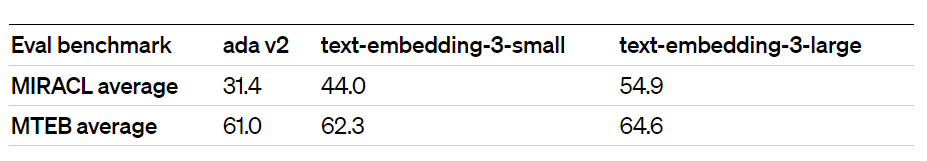

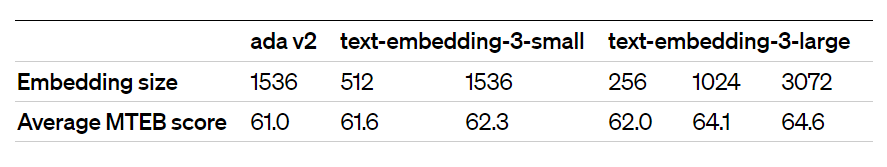

In [ ]:
embeddings_1= client.embeddings.create(
                                      model="text-embedding-3-large",
                                      input="How old are you?",
                                      dimensions=3072)
embeddings_1

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.0168280228972435, -0.002773887477815151, -0.02933274768292904, 0.019851593300700188, -0.01872972585260868, 0.0022163738030940294, -0.003345082513988018, 0.0007293852977454662, 0.015459890477359295, 0.027827803045511246, -0.01976950652897358, -0.029715824872255325, 0.0006353262579068542, -0.004552458878606558, 0.035489343106746674, 0.06276988983154297, -0.06501362472772598, -0.011957473121583462, -0.051605936139822006, -0.01600714400410652, 0.05724263936281204, 0.010753517039120197, -0.024544285610318184, -0.00799673143774271, -0.005130494479089975, 0.029168572276830673, 0.02355923131108284, -0.02039884589612484, -0.035927142947912216, -0.009207528084516525, 0.006392596289515495, 0.028238242492079735, 0.008585027419030666, 0.0012236229376867414, -0.010206264443695545, 0.005407541524618864, -0.01435170415788889, -0.020549342036247253, 0.007921483367681503, 0.030427252873778343, 0.0067106871865689754, 0.031549122184515, -0.030974507331

In [ ]:
embeddings_1.data[0].embedding[:10]

[-0.0168280228972435,
 -0.002773887477815151,
 -0.02933274768292904,
 0.019851593300700188,
 -0.01872972585260868,
 0.0022163738030940294,
 -0.003345082513988018,
 0.0007293852977454662,
 0.015459890477359295,
 0.027827803045511246]

In [ ]:
embeddings_2= client.embeddings.create(
                                      model="text-embedding-3-large",
                                      input="What is your age?",
                                      dimensions=3072)
embeddings_2.data[0].embedding

[-0.005858633667230606,
 -0.01003257930278778,
 -0.02577647753059864,
 0.006666981615126133,
 -0.02014070563018322,
 0.0018537230789661407,
 -0.010908919386565685,
 0.004812314175069332,
 0.014459606260061264,
 0.034600310027599335,
 -0.039979223161935806,
 -0.04215496405959129,
 -0.007955050095915794,
 0.0013447282835841179,
 0.010009915567934513,
 0.066541388630867,
 -0.024597950279712677,
 -0.009511308744549751,
 -0.034690968692302704,
 -0.011316870339214802,
 0.05877520143985748,
 0.005903961602598429,
 -0.03686670586466789,
 -0.01121110562235117,
 0.000829123193398118,
 0.048349779099226,
 0.007618867792189121,
 0.007819065824151039,
 -0.007528211921453476,
 -0.011150668375194073,
 0.004034184850752354,
 0.01678643934428692,
 0.018780868500471115,
 0.026154208928346634,
 0.020110486075282097,
 0.002568582072854042,
 -0.010115680284798145,
 -0.0073657869361341,
 0.022588413208723068,
 0.01995939388871193,
 -0.002336276462301612,
 0.02015581540763378,
 -0.0390726663172245,
 -0.01551

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([embeddings_1.data[0].embedding], [embeddings_2.data[0].embedding])

array([[0.7345826]])

END OF THE PROJECT